In [13]:
import io, os, sys, types
from nbformat import read
%run ./lib/init.ipynb
initfunc()

ibmqfactory.load_account:WARNING:2023-02-05 14:00:15,412: Credentials are already in use. The existing account in the session will be replaced.


{'1': 491, '0': 533}


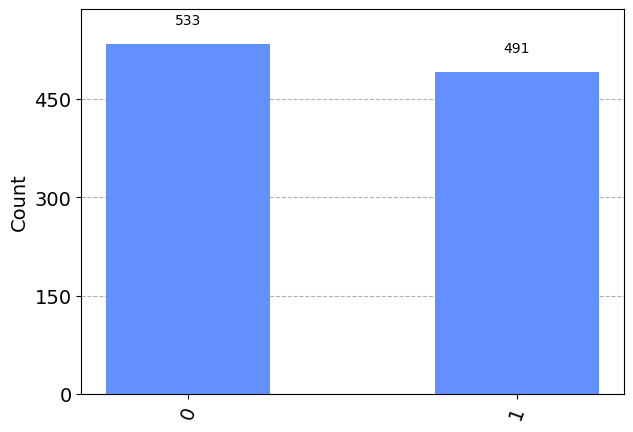

In [3]:
#一顆疊加態
from qiskit import *

q = QuantumRegister(1)
c = ClassicalRegister(1)

circuit = QuantumCircuit(q,c)
circuit.h(q[0])
circuit.measure(q,c)
circuit.draw()

simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator)
result = job.result()
counts = result.get_counts()
print(counts)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

{'01': 255, '11': 269, '10': 266, '00': 234}


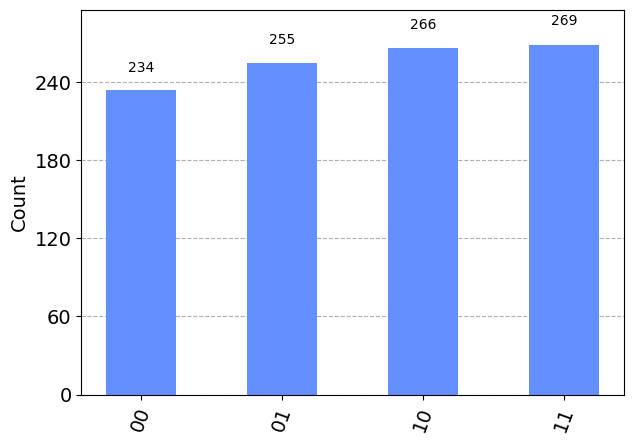

In [5]:
#兩顆疊加態
from qiskit import *

q = QuantumRegister(2)
c = ClassicalRegister(2)

circuit = QuantumCircuit(q,c)
circuit.h(q[0])
circuit.h(q[1])
circuit.measure(q,c)
circuit.draw()

simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator)
result = job.result()
counts = result.get_counts()
print(counts)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

ibmqfactory.load_account:WARNING:2023-02-05 14:04:11,345: Credentials are already in use. The existing account in the session will be replaced.


好的backend ibm_nairobi
Job Status: job has successfully run


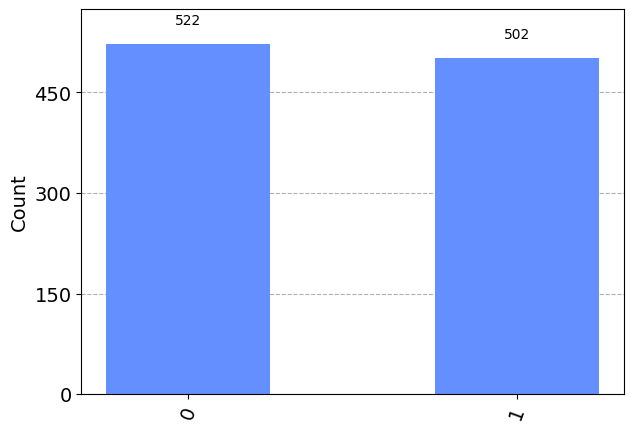

In [18]:
#用線上的IBM量子電腦
provider = IBMQ.load_account()

from qiskit import *

q = QuantumRegister(1)
c = ClassicalRegister(1)

circuit = QuantumCircuit(q,c)
circuit.h(q[0])
circuit.measure(q,c)
circuit.draw()

from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

devices = provider.backends(simulator = False)
backend = least_busy(devices)
print("好的我的 backend :", backend)
job = execute(circuit,backend = backend,shots = 1024)
job_monitor(job, interval= 5)
result = job.result()
counts = result.get_counts(circuit)

plot_histogram(counts)

{'11': 513, '00': 511}


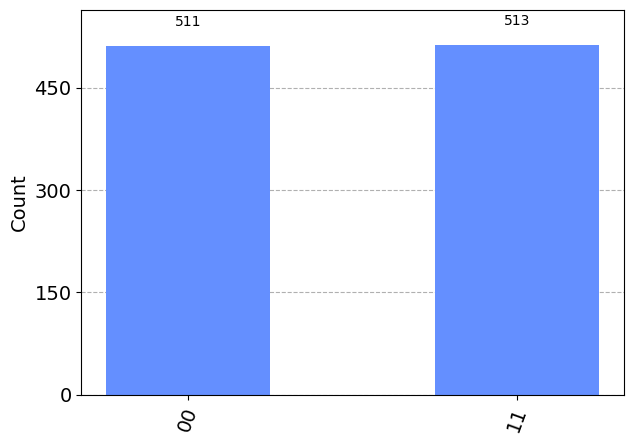

In [26]:
#兩顆疊加態 00+11
from qiskit import *

q = QuantumRegister(2)
c = ClassicalRegister(2)

circuit = QuantumCircuit(q,c)
circuit.h(q[1])
circuit.cx(q[1],q[0])
circuit.measure(q,c)
circuit.draw()

simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator)
result = job.result()
counts = result.get_counts()
print(counts)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

{'10': 512, '01': 512}


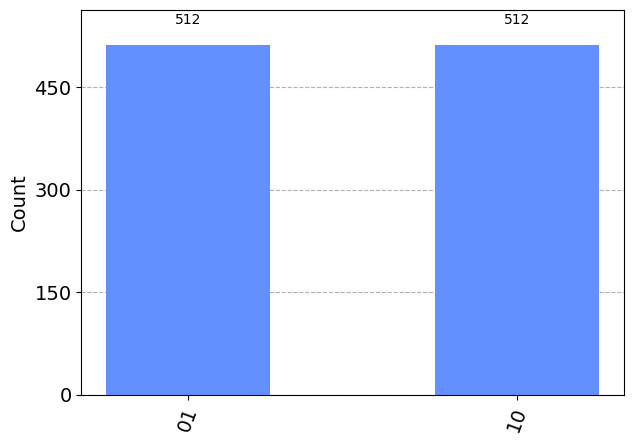

In [27]:
#兩顆疊加態 01+10
from qiskit import *

q = QuantumRegister(2)
c = ClassicalRegister(2)

circuit = QuantumCircuit(q,c)
circuit.h(q[1])
circuit.cx(q[1],q[0])
circuit.x(q[1])
circuit.measure(q,c)
circuit.draw()

simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator)
result = job.result()
counts = result.get_counts()
print(counts)

from qiskit.visualization import plot_histogram
plot_histogram(counts)